In [1]:
# importing necessary library
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_csv(r'C:\Users\Personal\Downloads\train.csv')
test_data=pd.read_csv(r'C:\Users\Personal\Downloads\test.csv')

In [3]:
train_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
test_data.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [5]:
train_data.shape

(31962, 3)

In [6]:
test_data.shape

(17197, 2)

In [7]:
train_data.drop(columns=['id'],inplace=True)
test_data.drop(columns=['id'], inplace=True)

In [8]:
train_data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [9]:
test_data.head()

,tweet
0,#studiolife #aislife #requires #passion #dedic...
1,@user #white #supremacists want everyone to s...
2,safe ways to heal your #acne!! #altwaystohe...
3,is the hp and the cursed child book up for res...
4,"3rd #bihday to my amazing, hilarious #nephew..."


<AxesSubplot:xlabel='label', ylabel='count'>

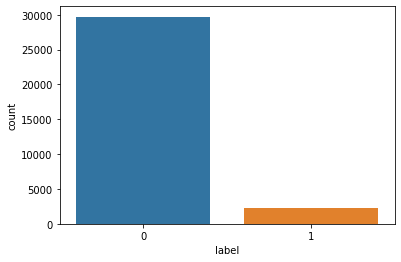

In [10]:
sns.countplot(x="label", data=train_data)

In [11]:
train_data['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

## Handling Imbalenced dataset

In [12]:
train_majority = train_data[train_data.label==0]
train_minority = train_data[train_data.label==1]

In [13]:
train_majority.shape

(29720, 2)

In [14]:
train_minority.shape

(2242, 2)

In [15]:
# Upsampling
from sklearn.utils import resample
majority = train_data[train_data['label'] == 1]
minority = train_data[train_data['label'] == 0]
train_minority_upsampled = resample(train_minority, 
                                 replace=True,    
                                 n_samples=len(train_majority),   
                                 random_state=123)
train_upsampled = pd.concat([train_minority_upsampled, train_majority])
train_upsampled['label'].value_counts()

0    29720
1    29720
Name: label, dtype: int64

In [16]:
train_upsampled.head()

,label,tweet
19492,1,@user you might be a libtard if... #libtard #...
16151,1,@user @user is good place to sta learning abt ...
25144,1,@user #allahsoil bernanke bailed out wall stre...
30902,1,@user i am just waiting for somebody other tha...
16522,1,why are white people #expats when the rest of ...


In [17]:
train_upsampled.shape

(59440, 2)

In [18]:
X = train_upsampled['tweet'].values
y = train_upsampled['label'].values

In [19]:
X.shape

(59440,)

In [20]:
y.shape

(59440,)

## Train- Test spliting

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 0)

In [22]:
X_train.shape

(35664,)

In [23]:
X_test.shape

(23776,)

In [24]:
y_train.shape

(35664,)

In [25]:
y_test.shape

(23776,)

## NLP preprocessing

In [26]:
#Importing NLP libraries 
import re  #Regular Expression
from bs4 import BeautifulSoup
import nltk   
from nltk.corpus import stopwords

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Personal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Personal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
# Reading english stopwords
stop_words = set(stopwords.words('english'))
# stop_words

In [30]:
#Preprocess function
def preprocess_text(data):
    sentence = []

    for review in data:
     striped_review = review.strip()
    soup_review = BeautifulSoup(striped_review).get_text()
    review_text = re.sub('[^a-zA-Z]', ' ', soup_review)
    words = review_text.lower().split()

    clean_words = [word for word in words if not word in stop_words]  #Avoidong stop words

    join_str = ''

    for w in clean_words:
     join_str = join_str + ' ' + w
    
    sentence.append(join_str.strip())

    return sentence

In [31]:
# Clean data
Xtrain = np.array(preprocess_text(X_train))
Xtest = np.array(preprocess_text(X_test))

## Vectorizing

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
pipeline_sgd = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('nb', MultinomialNB()),])

In [51]:
model = pipeline_sgd.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [52]:
y_predict

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_score(y_predict, y_test)

0.9470895020188426

In [55]:
l = '''
kill you man
'''
text = [l]
pre = preprocess_text(text)
pre

['kill man']

In [56]:
model.predict(pre)

array([1], dtype=int64)

In [57]:
import pickle
pickle.dump(model, open("nb_multi.pkl",'wb'))